In [ ]:
### What is the Superstore Dataset?

The Superstore dataset contains information about customers, their demographics, purchasing behavior, and their response to marketing campaigns. It includes variables such as income, marital status, product-wise spending, and the number of children at home.

### Why is it used?

This dataset is useful for customer segmentation, identifying spending patterns, and analyzing which types of customers are more likely to respond to marketing efforts. The insights can help businesses optimize their campaign strategies and improve customer targeting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("C:/Users/malus/Downloads/superstore_data.csv")

In [5]:
df.head()                  # Preview first 5 rows
df.shape                   # Check rows and columns
df.columns                 # View column names
df.info()                  # Data types and non-null values
df.describe()              # Summary statistics for numerical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


### Task 1: Problem Definition & Dataset Overview

- Loaded the Superstore marketing dataset.
- Dataset contains 2,240 rows and 22 columns.
- Features include customer demographics, product spending, marketing response, etc.

In [10]:
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [12]:
df['Income'] = df['Income'].fillna(df['Income'].median())


In [14]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [16]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [18]:
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [20]:
df['Family_Size'] = df['Kidhome'] + df['Teenhome']


In [22]:
df['Customer_Tenure_Days'] = (pd.to_datetime("2025-07-27") - df['Dt_Customer']).dt.days


In [24]:
    df['Education'] = df['Education'].str.strip().str.lower()
df['Marital_Status'] = df['Marital_Status'].str.strip().str.lower()


In [26]:
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    2240 non-null   int64         
 1   Year_Birth            2240 non-null   int64         
 2   Education             2240 non-null   object        
 3   Marital_Status        2240 non-null   object        
 4   Income                2240 non-null   float64       
 5   Kidhome               2240 non-null   int64         
 6   Teenhome              2240 non-null   int64         
 7   Dt_Customer           2240 non-null   datetime64[ns]
 8   Recency               2240 non-null   int64         
 9   MntWines              2240 non-null   int64         
 10  MntFruits             2240 non-null   int64         
 11  MntMeatProducts       2240 non-null   int64         
 12  MntFishProducts       2240 non-null   int64         
 13  MntSweetProducts  

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Spend,Family_Size,Customer_Tenure_Days
0,1826,1970,graduation,divorced,84835.0,0,0,2014-06-16,0,189,...,1,4,4,6,1,1,0,1190,0,4059
1,1,1961,graduation,single,57091.0,0,0,2014-06-15,0,464,...,1,7,3,7,5,1,0,577,0,4060
2,10476,1958,graduation,married,67267.0,0,1,2014-05-13,0,134,...,1,3,2,5,2,0,0,251,1,4093
3,1386,1967,graduation,together,32474.0,1,1,2014-11-05,0,10,...,1,1,0,2,7,0,0,11,2,3917
4,5371,1989,graduation,single,21474.0,1,0,2014-08-04,0,6,...,2,3,1,2,7,1,0,91,1,4010


In [28]:
df.to_csv("cleaned_superstore_data.csv", index=False)


In [31]:
# 1. Standardize Education column: capitalize first letter of each word
df['Education'] = df['Education'].str.strip().str.title()

# 2. Replace 'Phd' or 'PhD' with 'PHD'
df['Education'] = df['Education'].replace({'Phd': 'PHD', 'PhD': 'PHD'})

# 3. Optional: Capitalize first letter in Marital_Status
df['Marital_Status'] = df['Marital_Status'].str.strip().str.title()


In [33]:
df.to_csv("cleaned_superstore_data1.csv", index=False)

In [40]:
import pandas as pd
df = pd.read_csv("cleaned_superstore_data1.csv")


In [42]:
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2240 non-null   int64  
 1   Year_Birth            2240 non-null   int64  
 2   Education             2240 non-null   object 
 3   Marital_Status        2240 non-null   object 
 4   Income                2240 non-null   float64
 5   Kidhome               2240 non-null   int64  
 6   Teenhome              2240 non-null   int64  
 7   Dt_Customer           2240 non-null   object 
 8   Recency               2240 non-null   int64  
 9   MntWines              2240 non-null   int64  
 10  MntFruits             2240 non-null   int64  
 11  MntMeatProducts       2240 non-null   int64  
 12  MntFishProducts       2240 non-null   int64  
 13  MntSweetProducts      2240 non-null   int64  
 14  MntGoldProds          2240 non-null   int64  
 15  NumDealsPurchases    

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Spend,Family_Size,Customer_Tenure_Days
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,4,4,6,1,1,0,1190,0,4059
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,7,3,7,5,1,0,577,0,4060
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,1,3,2,5,2,0,0,251,1,4093
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,1,1,0,2,7,0,0,11,2,3917
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,2,3,1,2,7,1,0,91,1,4010


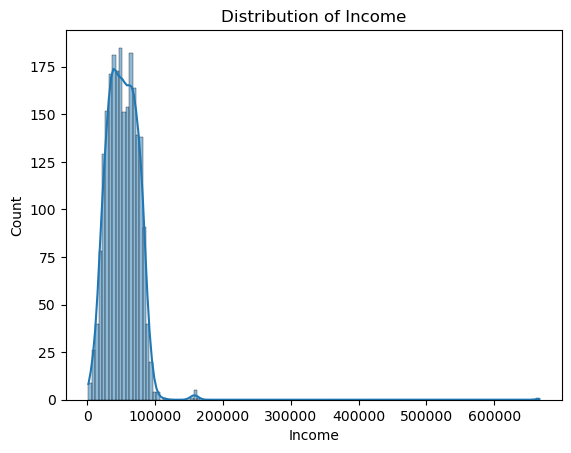

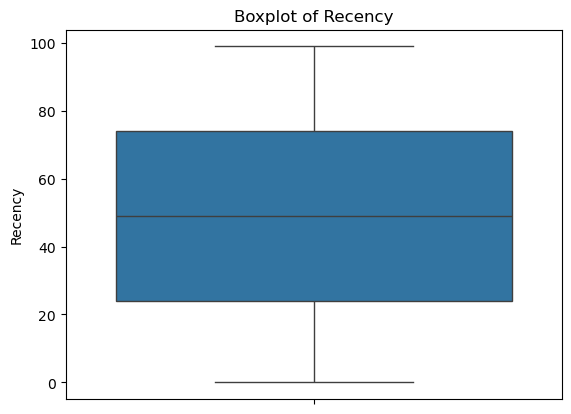

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Income
sns.histplot(df['Income'], kde=True)
plt.title("Distribution of Income")
plt.show()

# Boxplot of Recency
sns.boxplot(y=df['Recency'])
plt.title("Boxplot of Recency")
plt.show()


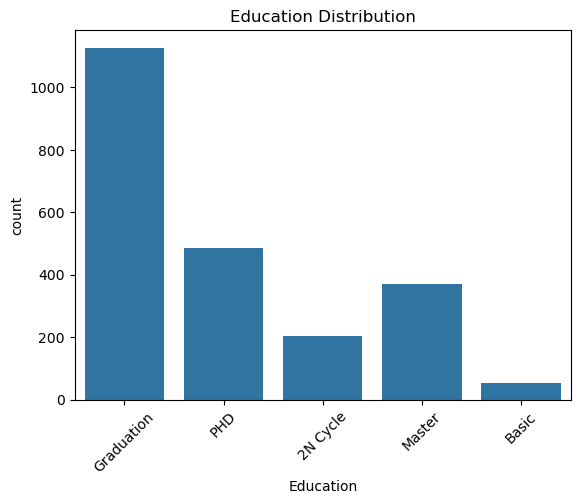

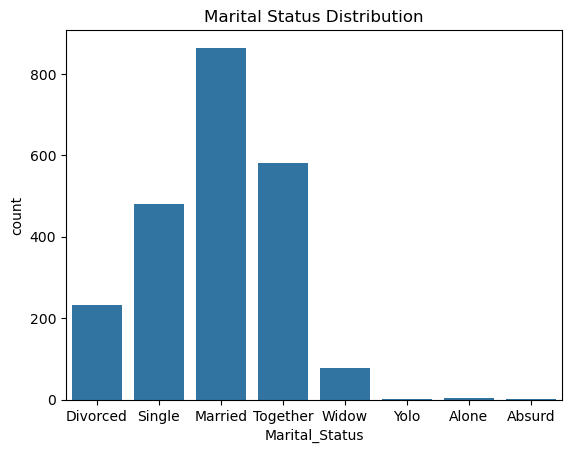

In [46]:
# Education level distribution
sns.countplot(x='Education', data=df)
plt.title("Education Distribution")
plt.xticks(rotation=45)
plt.show()

# Marital Status
sns.countplot(x='Marital_Status', data=df)
plt.title("Marital Status Distribution")
plt.show()


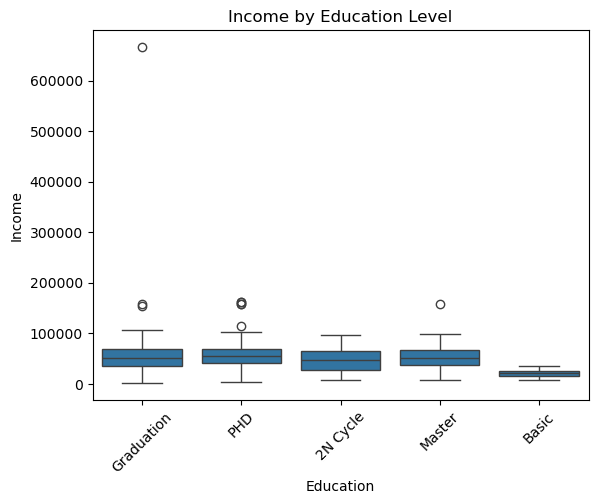

In [48]:
sns.boxplot(x='Education', y='Income', data=df)
plt.title("Income by Education Level")
plt.xticks(rotation=45)
plt.show()


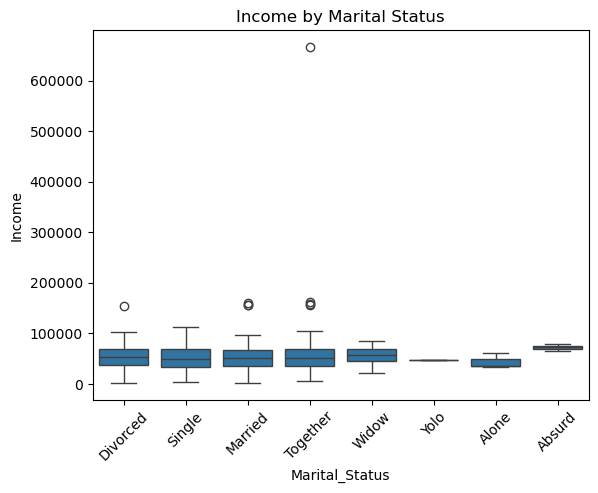

In [50]:
sns.boxplot(x='Marital_Status', y='Income', data=df)
plt.title("Income by Marital Status")
plt.xticks(rotation=45)
plt.show()


In [6]:
import pandas as pd

# Load your cleaned Superstore dataset
df = pd.read_csv("cleaned_superstore_data1.csv")  # change filename if different

# Function to create recency segments
def recency_segment(days):
    if days <= 30:
        return "Active"      # Purchased within the last month
    elif days <= 60:
        return "Warm"        # Purchased in the last 1-2 months
    else:
        return "Dormant"     # No purchase for over 2 months

# Apply the function to create a new column
df['Recency_Segment'] = df['Recency'].apply(recency_segment)

# Check how many customers are in each segment
print(df['Recency_Segment'].value_counts())

# Save to a new file
df.to_csv("cleaned_superstore_with_segments.csv", index=False)


Recency_Segment
Dormant    862
Active     724
Warm       654
Name: count, dtype: int64


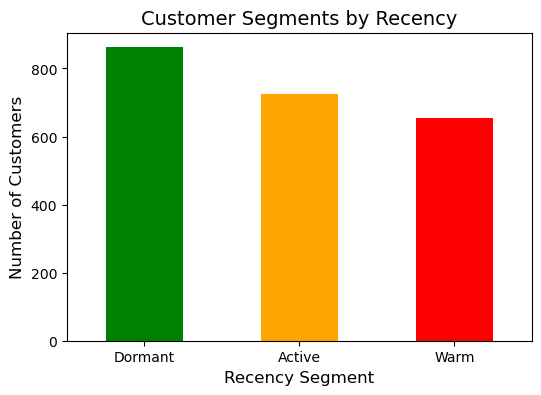

In [8]:
import matplotlib.pyplot as plt

# Count of each segment
segment_counts = df['Recency_Segment'].value_counts()

# Create the bar chart
plt.figure(figsize=(6,4))
segment_counts.plot(kind='bar', color=['green', 'orange', 'red'])

# Chart details
plt.title("Customer Segments by Recency", fontsize=14)
plt.xlabel("Recency Segment", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=0)

# Show the chart
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("cleaned_superstore_with_segments.csv")


In [8]:
print(df.shape)
df.head()


(2240, 26)


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Spend,Family_Size,Customer_Tenure_Days,Recency_Segment
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,4,4,6,1,1,0,1190,0,4059,Active
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,3,7,5,1,0,577,0,4060,Active
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,3,2,5,2,0,0,251,1,4093,Active
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,1,0,2,7,0,0,11,2,3917,Active
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,3,1,2,7,1,0,91,1,4010,Active


In [23]:
print(df.columns)

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Total_Spend', 'Family_Size',
       'Customer_Tenure_Days', 'Recency_Segment'],
      dtype='object')


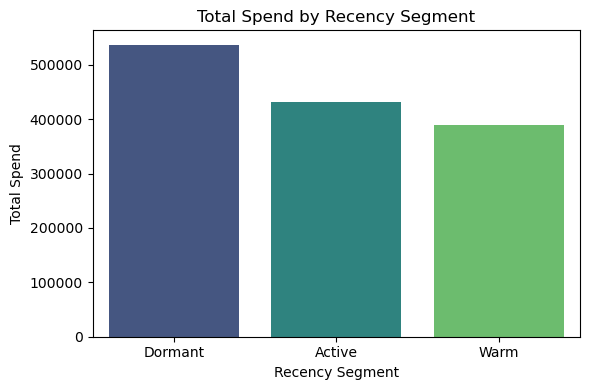

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and sum
sales_by_segment = df.groupby('Recency_Segment')['Total_Spend'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=sales_by_segment.index, y=sales_by_segment.values, hue=sales_by_segment.index, palette="viridis", legend=False)
plt.title("Total Spend by Recency Segment")
plt.xlabel("Recency Segment")
plt.ylabel("Total Spend")
plt.tight_layout()
plt.show()


C:\Users\malus\AppData\Local\Temp\ipykernel_13032\1043869273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_education.index, y=sales_by_education.values, palette="magma")


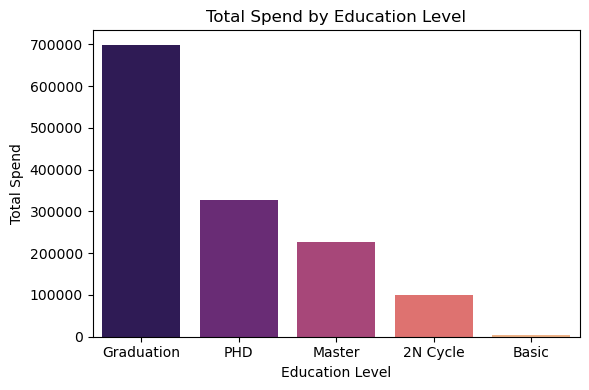

In [29]:
sales_by_education = df.groupby('Education')['Total_Spend'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=sales_by_education.index, y=sales_by_education.values, palette="magma")
plt.title("Total Spend by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Total Spend")
plt.tight_layout()
plt.show()

